In [1]:
# Allow reload of objects
%load_ext autoreload
%autoreload
from pelenet.utils import Utils
from pelenet.experiments.readout import ReadoutExperiment

# Official modules
import numpy as np
import nxsdk.api.n2a as nx
import matplotlib
import matplotlib.pyplot as plt
from time import time

In [2]:
# Initilizes the experiment and utils
utils = Utils.instance()
exp = ReadoutExperiment()

In [3]:
# Build network
exp.build()

# Get spectral radius
utils.getSpectralRadius(exp.net.initialWeights)

/home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/scipy/sparse/compressed.py:746: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


1.11

In [4]:
# Run network
exp.run()

INFO:DRV:  Connecting to 127.0.0.1:44395
INFO:DRV:      Host server up..............Done 0.05s
INFO:DRV:      Encoding axons/synapses.....Done 15.07s
INFO:DRV:      Compiling Embedded snips....Done 0.17s
INFO:DRV:      Encoding probes.............Done 3.84ms
INFO:HST:  Using Kapoho Bay serial number 308
INFO:HST:  Args chip=0 cpu=0 /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/driver/compilers/../../../temp/1575721415.8563044/launcher_chip0_lmt0.bin --chips=2 --remote-relay=0 --epoch=0 
INFO:HST:  Args chip=1 cpu=0 /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/driver/../bin/x86/kb/init_bs.bin --chips=2 --remote-relay=0 --epoch=0 
INFO:HST:  Lakemont_driver...
INFO:DRV:      Booting up..................Done 1.25s
INFO:DRV:      Transferring probes.........Done 0.04s
INFO:DRV:      Configuring registers.......Done 15.07s
INFO:DRV:      Transferring spikes.........Done 1.53s
INFO:HST:  chip=1 cpu=0 halted, status=0x0


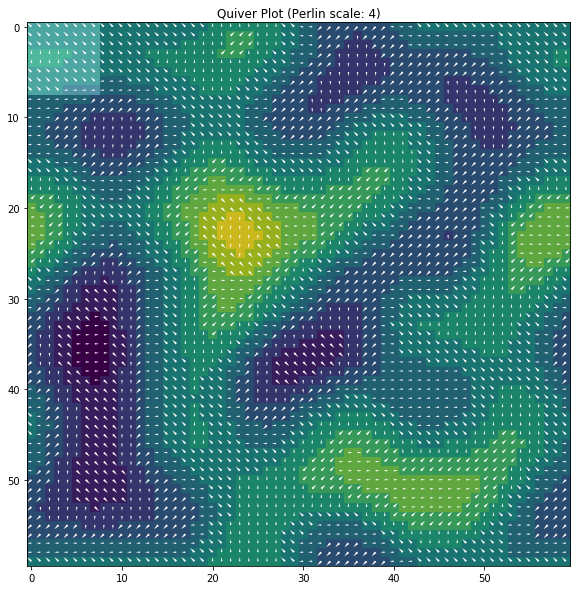

In [5]:
exp.net.plot.landscape()

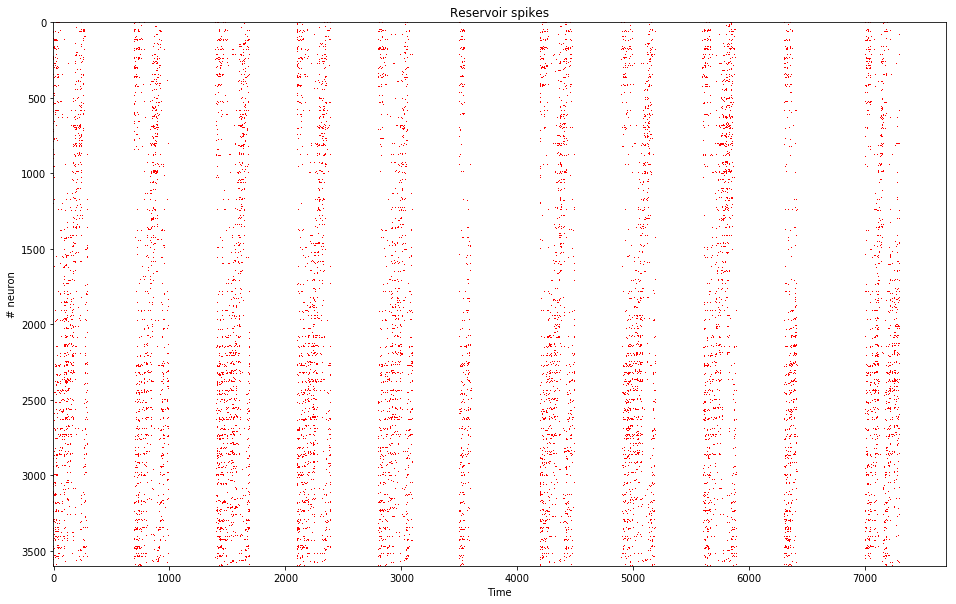

In [6]:
exp.net.plot.reservoirSpikeTrain()

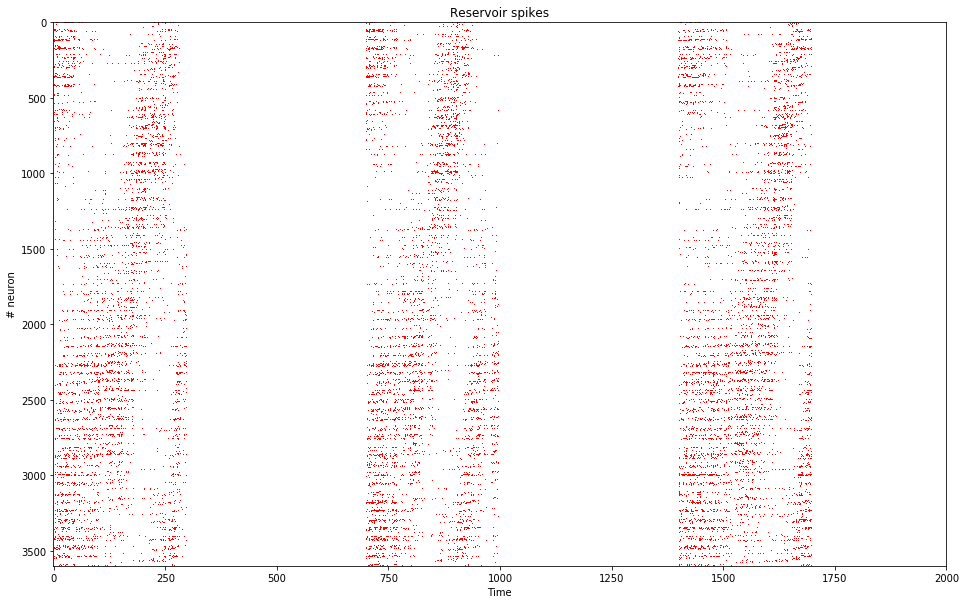

In [35]:
exp.net.plot.reservoirSpikeTrain(fr=0, to=2000)

In [7]:
exp.p.stopRelaxation

399

In [8]:
#exp.net.exVoltageProbes[0].data[0,:100]

In [9]:
p = exp.net.exVoltageProbes[0].plot()

IndexError: list index out of range

In [ ]:
voltageExSums = []
for j in range(400,650):
    voltageSum =  np.sum([ exp.net.exVoltageProbes[i].data[:,j] for i in range(len(exp.net.exVoltageProbes)) ])
    voltageExSums.append(voltageSum)
p = plt.plot(voltageExSums)

In [ ]:
print(voltageExSums[-1])

In [ ]:
p = exp.net.inVoltageProbes[0].plot()

In [ ]:
voltageSums = []
for j in range(400,500):
    voltageSum =  np.sum([ exp.net.inVoltageProbes[i].data[:,j] for i in range(len(exp.net.inVoltageProbes)) ])
    voltageSums.append(voltageSum)
p = plt.plot(voltageSums)

In [ ]:
print(voltageSums[-1])

In [10]:
offset = exp.p.cueSteps + exp.p.cueRelaxation

In [25]:
data1 = exp.net.exSpikeTrains[:,offset:offset+exp.p.movementSteps]
data2 = exp.net.exSpikeTrains[:,offset+exp.p.trialSteps:offset+exp.p.trialSteps+exp.p.movementSteps]
data3 = exp.net.exSpikeTrains[:,offset+2*exp.p.trialSteps:offset+2*exp.p.trialSteps+exp.p.movementSteps]
data4 = exp.net.exSpikeTrains[:,offset+3*exp.p.trialSteps:offset+3*exp.p.trialSteps+exp.p.movementSteps]
data5 = exp.net.exSpikeTrains[:,offset+4*exp.p.trialSteps:offset+4*exp.p.trialSteps+exp.p.movementSteps]

In [ ]:
data = [ exp.net.exSpikeTrains[:,offset+exp.p.trialSteps:offset+exp.p.trialSteps+exp.p.movementSteps] for i in range()]

In [26]:
data = np.concatenate((data1[:,:,np.newaxis], data2[:,:,np.newaxis], data3[:,:,np.newaxis], data4[:,:,np.newaxis], data5[:,:,np.newaxis]), axis=2)

In [ ]:
#trainData = np.array([exp.trainNets[i].exSpikeTrains[:,offset:] for i in range(2)])
#trainData = np.rollaxis(trainData, 0, 3)
#trainData.shape

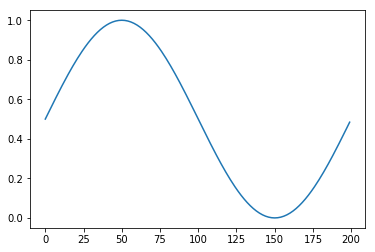

In [24]:
p = plt.plot(exp.targetFunction)

In [30]:
(params, ye, performance) = utils.trainOLS(data, data1, exp.targetFunction, filter='double exponential')

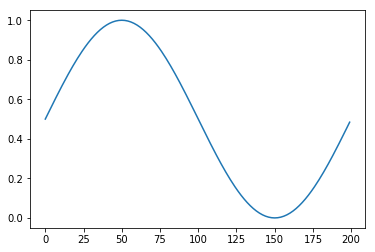

In [31]:
plt.plot(ye)

In [32]:
performance.cor

0.9999999999999999

In [ ]:
import sys

In [ ]:
sys.getsizeof(exp.trainNets[0].exSpikeTrains)